In [1]:
%load_ext autoreload
%autoreload 2

In [54]:
%reload_ext autoreload

In [55]:
# !pip install rfpimp
# !pip install seaborn

In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import datasets

from stencil.utils import *
from stencil.timer import Timer

import seaborn as sns

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
cali_housing = datasets.fetch_california_housing()

In [4]:
data = np.concatenate([cali_housing.data, cali_housing.target[:, np.newaxis]], axis=1)
data.shape

(20640, 9)

In [59]:
df = pd.DataFrame(data, columns=cali_housing.feature_names + cali_housing.target_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
summary_all(df)

,count,min,max,mean,type,#null,%null,#unique,%unique,unique_values
MedInc,20640.0,0.499900,15.000100,3.870671,float64,0,0,12928,62.6357,"[8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.036..."
HouseAge,20640.0,1.000000,52.000000,28.639486,float64,0,0,52,0.251938,"[41.0, 21.0, 52.0, 42.0, 50.0, 40.0, 49.0, 48...."
AveRooms,20640.0,0.846154,141.909091,5.429000,float64,0,0,19392,93.9535,"[6.984126984126984, 6.238137082601054, 8.28813..."
AveBedrms,20640.0,0.333333,34.066667,1.096675,float64,0,0,14233,68.9583,"[1.0238095238095237, 0.9718804920913884, 1.073..."
Population,20640.0,3.000000,35682.000000,1425.476744,float64,0,0,3888,18.8372,"[322.0, 2401.0, 496.0, 558.0, 565.0, 413.0, 10..."
AveOccup,20640.0,0.692308,1243.333333,3.070655,float64,0,0,18841,91.2839,"[2.5555555555555554, 2.109841827768014, 2.8022..."
Latitude,20640.0,32.540000,41.950000,35.631861,float64,0,0,862,4.17636,"[37.88, 37.86, 37.85, 37.84, 37.83, 37.82, 37...."
Longitude,20640.0,-124.350000,-114.310000,-119.569704,float64,0,0,844,4.08915,"[-122.23, -122.22, -122.24, -122.25, -122.26, ..."
MedHouseVal,20640.0,0.149990,5.000010,2.068558,float64,0,0,3842,18.6143,"[4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.9..."


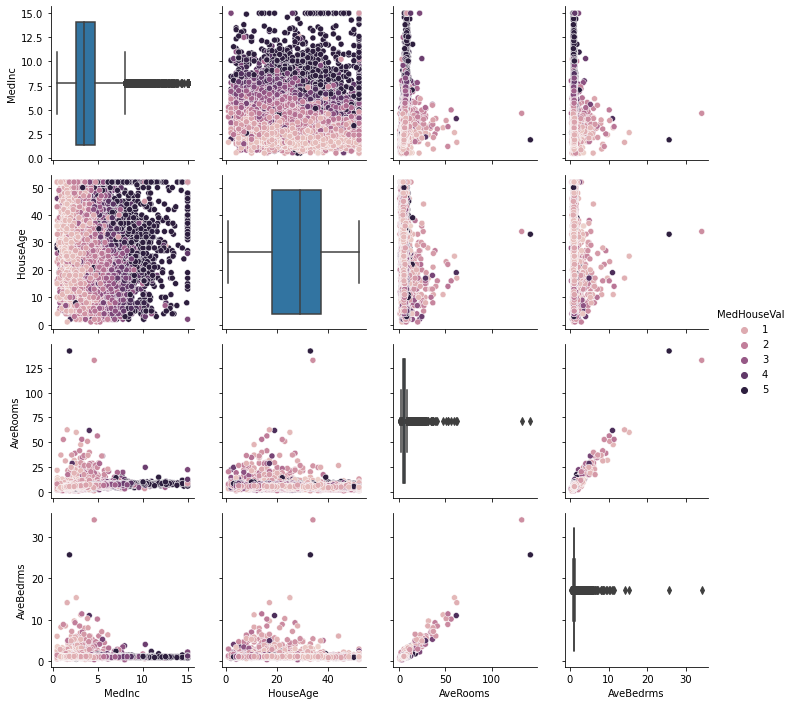

In [24]:
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedHouseVal']
g = sns.PairGrid(df[columns], hue="MedHouseVal")
g.map_diag(sns.boxplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

In [19]:
df.MedHouseVal.unique()

array([4.526, 3.585, 3.521, ..., 4.258, 2.007, 0.47 ])

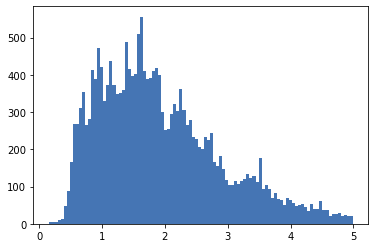

In [23]:
histogram(df.query('MedHouseVal<5'), col=['MedHouseVal'], dtype=np.float, bins=100)

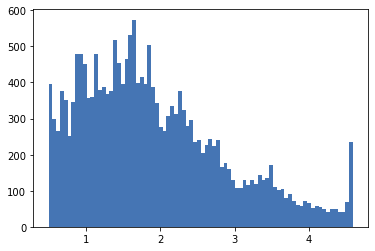

In [60]:
histogram_percentage(df.query('MedHouseVal<5'), col=['MedHouseVal'], dtype=np.float, bins=80)